In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2020-08-05 07:37:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.217.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2020-08-05 07:37:04 (117 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [3]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [6]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [7]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
377/377 [==============================] - 7s 19ms/step - loss: 6.6109 - accuracy: 0.0773
Epoch 2/100
377/377 [==============================] - 7s 19ms/step - loss: 5.7361 - accuracy: 0.1147
Epoch 3/100
377/377 [==============================] - 7s 19ms/step - loss: 4.8887 - accuracy: 0.1622
Epoch 4/100
377/377 [==============================] - 7s 19ms/step - loss: 3.9978 - accuracy: 0.2301
Epoch 5/100
377/377 [==============================] - 7s 19ms/step - loss: 3.1495 - accuracy: 0.3337
Epoch 6/100
377/377 [==============================] - 7s 19ms/step - loss: 2.5002 - accuracy: 0.4383
Epoch 7/100
377/377 [==============================] - 7s 19ms/step - loss: 2.0422 - accuracy: 0.5230
Epoch 8/100
377/377 [==============================] - 7s 19ms/step - loss: 1.6558 - accuracy: 0.6037
Epoch 9/100
377/377 [==============================] - 7s 19ms/step - loss: 1.3664 - accuracy: 0.6737
Epoch 10/100
377/377 [==============================] - 7s 19ms/step - loss: 1.182

In [8]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

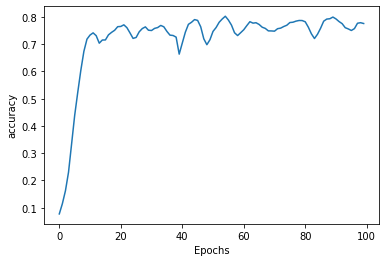

In [9]:
plot_graphs(history, 'accuracy')

In [10]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
I've got a bad feeling about this little isle of green back tears and they are gay they began abusing claret down like an old dead tree after love them still make i sat me down boy love sends in erin go bragh town she shadow lamenting stood in the distance her feet barrow then dead more on tree to tree wid gone alas to cry of ireland were saying johnny dhu spirits no more again high before them all in far far far of your head in peace attend thee more dying rocky ball or high in bone mary in a prisoner the love in love


In [11]:
temp_layer=model.layers[0]

In [25]:
weights_temp=temp_layer.get_weights()

In [26]:
weights_temp

[array([[ 3.1796908 ,  0.22735678,  2.7962224 , ...,  0.22763969,
         -0.6309328 ,  0.809698  ],
        [ 0.6071152 , -0.86123127,  0.8445218 , ..., -0.46499276,
          0.92890644,  0.32391816],
        [-0.10586869, -0.05798539,  0.6628816 , ...,  2.5685902 ,
         -0.23045433, -1.3246949 ],
        ...,
        [ 1.7333186 , -2.4063725 ,  0.7362407 , ..., -0.55180174,
         -0.6599232 , -1.195539  ],
        [-0.04241865,  1.023682  ,  0.29592225, ..., -0.6228343 ,
         -1.7519706 , -0.95268315],
        [ 0.78146064, -0.02875396, -0.24197441, ...,  0.3756201 ,
          1.200248  , -1.5974449 ]], dtype=float32)]

In [27]:
weights_temp[0]

array([[ 3.1796908 ,  0.22735678,  2.7962224 , ...,  0.22763969,
        -0.6309328 ,  0.809698  ],
       [ 0.6071152 , -0.86123127,  0.8445218 , ..., -0.46499276,
         0.92890644,  0.32391816],
       [-0.10586869, -0.05798539,  0.6628816 , ...,  2.5685902 ,
        -0.23045433, -1.3246949 ],
       ...,
       [ 1.7333186 , -2.4063725 ,  0.7362407 , ..., -0.55180174,
        -0.6599232 , -1.195539  ],
       [-0.04241865,  1.023682  ,  0.29592225, ..., -0.6228343 ,
        -1.7519706 , -0.95268315],
       [ 0.78146064, -0.02875396, -0.24197441, ...,  0.3756201 ,
         1.200248  , -1.5974449 ]], dtype=float32)

In [56]:
np.save("embeding.npy",weights_temp[1:])

In [17]:
word_index=tokenizer.word_index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [28]:
weights_temp=weights_temp[0]


In [57]:
weights_temp[1:].shape

(2689, 100)

In [52]:
words_name=[]
for word_num in range(1, 2690):
  word_ne = reverse_word_index[word_num]
  words_name.append(word_ne)

In [53]:
words_name=np.array(words_name)

In [54]:
words_name.shape

(2689,)

In [44]:
reverse_word_index[1]

'the'

In [55]:
np.save("words.npy",words_name)

In [61]:
np.where(labels==0)

(array([], dtype=int64),)

In [60]:
ys[1]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [62]:
tf.keras.utils.to_categorical([3,2])

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [65]:
weights=weights_temp
weights.shape

(2690, 100)

In [66]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, 2690):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()